In [1]:
#import libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import emoji

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chat.txt


In [3]:
 def read_file(file):
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    return content
chat = read_file('/kaggle/input/chat.txt')
len(chat)

477

In [4]:
 #Remove new lines
chat = [line.strip() for line in chat]
print("length of chat is:")
print(len(chat))

#Clean out the join notification lines
clean_chat = [line for line in chat if not "joined using this" in line]

#Further cleaning
#Remove empty lines
clean_chat = [line for line in clean_chat if len(line) > 1]
print("length of clean_chat is:")
print(len(clean_chat))

length of chat is:
477
length of clean_chat is:
458


In [5]:
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs) 

372

The length of the chat here shpws 372 instead of 477 because it doesnt consider the messages such as

'[name1] added [name2]' or '[name3] left the group chat'


In [6]:
msgs[0:10] #displays the top 10 messages in the chat 

['25/6/15, 1:42:12 AM: \u200eVishnu Gaud created this group',
 '25/6/15, 1:42:12 AM: \u200eYou were added',
 '18/12/16, 1:57:38 AM: Shahain: <\u200eimage omitted>',
 '21/12/16, 9:54:46 PM: Pankaj Sinha: <\u200eimage omitted>',
 '21/12/16, 9:57:45 PM: Shahain: Wow',
 '21/12/16, 10:48:51 PM: Sakshi: <\u200eimage omitted>',
 '21/12/16, 10:49:00 PM: Sakshi: <\u200eimage omitted>',
 '21/12/16, 10:50:12 PM: Neha Wipro: Awsum😀😀👍🏼👍🏼',
 '21/12/16, 10:51:21 PM: Sakshi: 🙈',
 '21/12/16, 10:57:01 PM: Ganguly: 🙂🙂👍🏻👍🏻']

Okay, so now let's save TIME, DATE, SENDER NAME, MESSAGE in different array

1. Time

In [7]:
time = [msgs[i].split(' ')[1].split(' ,')[0] for i in range(len(msgs))]
# split(' ') and split(',')to consider the text after date ends i.e. after dd/mm/yy,  and before the name of the author 
# you can change the position of the array from 0 to 1 to see how it works 

print("length of time is:")
print(len(time))
time
#shows only time 

length of time is:
372


['1:42:12',
 '1:42:12',
 '1:57:38',
 '9:54:46',
 '9:57:45',
 '10:48:51',
 '10:49:00',
 '10:50:12',
 '10:51:21',
 '10:57:01',
 '11:28:51',
 '11:48:42',
 '12:08:04',
 '12:24:00',
 '12:25:02',
 '12:36:54',
 '6:27:38',
 '12:10:31',
 '12:10:45',
 '12:40:48',
 '2:58:09',
 '2:55:14',
 '7:59:17',
 '2:34:15',
 '2:34:59',
 '2:37:05',
 '2:37:27',
 '2:37:32',
 '2:37:47',
 '2:39:48',
 '2:40:03',
 '2:40:12',
 '2:43:10',
 '2:44:00',
 '2:59:53',
 '3:00:06',
 '3:22:17',
 '3:22:19',
 '3:22:19',
 '6:54:40',
 '11:19:30',
 '2:35:30',
 '2:37:06',
 '2:47:37',
 '3:55:08',
 '4:00:17',
 '2:02:28',
 '2:05:04',
 '10:09:05',
 '11:06:37',
 '1:28:12',
 '8:27:36',
 '5:17:40',
 '5:20:22',
 '5:20:28',
 '5:20:43',
 '5:22:03',
 '5:39:24',
 '5:39:34',
 '5:58:30',
 '5:58:32',
 '5:59:20',
 '5:59:26',
 '6:06:03',
 '6:06:18',
 '6:07:09',
 '6:07:26',
 '6:10:32',
 '9:17:44',
 '2:30:16',
 '1:52:37',
 '2:30:40',
 '2:31:28',
 '2:31:36',
 '2:32:16',
 '2:32:27',
 '2:32:55',
 '2:33:11',
 '2:33:13',
 '2:33:21',
 '2:33:23',
 '2:33:34',

2. Date

In [8]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
#considers the text before , 
len(date)
date
#shows only date

['25/6/15',
 '25/6/15',
 '18/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '21/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '22/12/16',
 '25/12/16',
 '25/12/16',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '1/1/17',
 '2/1/17',
 '2/1/17',
 '2/1/17',
 '2/1/17',
 '2/1/17',
 '8/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '10/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',
 '11/1/17',


3. Name

In [9]:
name  = [msgs[i].split(' ')[3].split(':')[0] for i in range(len(msgs))]
#considers the text after i.e. split(" ") the time series ends and before the content of the message begins i.e. split(":")
len(name)
name

['\u200eVishnu',
 '\u200eYou',
 'Shahain',
 'Pankaj',
 'Shahain',
 'Sakshi',
 'Sakshi',
 'Neha',
 'Sakshi',
 'Ganguly',
 'Vishnu',
 'Venu',
 'Kushbhu',
 '\u200eMessages',
 "Nauty's",
 'Sakshi',
 'Preeti',
 'Kushbhu',
 'Kushbhu',
 'Shahain',
 'Preeti',
 'Pankaj',
 'Preeti',
 'Shahain',
 'Mukti',
 'Ganguly',
 "Nauty's",
 'Vishnu',
 'Vishnu',
 'Pankaj',
 'Neha',
 'Shweta',
 'Kushbhu',
 'Kranthi',
 'Venu',
 'Venu',
 'Sahil',
 'Sahil',
 'Sahil',
 'Preeti',
 'Shradha',
 'Neha',
 'Yogesh',
 'Kranthi',
 'Vishnu',
 'Neha',
 'Kranthi',
 'Kranthi',
 'Vishnu',
 'Neha',
 'Shahain',
 'Kushbhu',
 'Vishnu',
 'Shahain',
 'Shahain',
 'Shahain',
 'Shahain',
 'Neha',
 'Neha',
 'Vishnu',
 'Vishnu',
 'Vishnu',
 'Vishnu',
 'Shahain',
 'Mukti',
 'Vishnu',
 'Vishnu',
 'Shahain',
 'Sahil',
 '\u200eMukti',
 'Kranthi',
 'Mukti',
 'Pankaj',
 'Yogesh',
 'Shweta',
 'Vishnu',
 'Kushbhu',
 'Ganguly',
 'Kushbhu',
 'Shahain',
 'Vishnu',
 'Shahain',
 'Vishnu',
 'Vishnu',
 'Shahain',
 'Shahain',
 'Vishnu',
 'Shahain',
 'S

4. Message

In [10]:
content = [] #list to contain the text messages
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[4]) 
  except IndexError:
    content.append('Missing Text')
len(content)
content

['Missing Text',
 'Missing Text',
 ' <\u200eimage omitted>',
 ' <\u200eimage omitted>',
 ' Wow',
 ' <\u200eimage omitted>',
 ' <\u200eimage omitted>',
 ' Awsum😀😀👍🏼👍🏼',
 ' 🙈',
 ' 🙂🙂👍🏻👍🏻',
 ' Waste out of wealth 😂',
 ' Fancy dress competition?',
 ' 😂😂😂',
 'Missing Text',
 ' Superrrrrrr se bhiiiiiiii uperrrrrrrr',
 ' We were Divided into four groups... Each group had to use newspapers only for dressing up one of their team members',
 ' 👌👌👌👌',
 ' Dunia ka sbse khatarnak proposal.. Must watch 😂😂😂😂😂😂',
 ' <\u200evideo omitted>',
 ' 😀',
 ' 😄😄😄😃😃',
 ' Merry Christmas🎅🏻🎄☃',
 ' <\u200eimage omitted>',
 ' Happy new year everyone!!! Hope new year bring happiness, success and good luck!! God bless',
 ' Happy new year everyone',
 ' Happy new year to everyone 💥💥',
 ' Happy new year!!!',
 ' Hey all',
 ' Wish you all good luck for new year',
 ' Happy new year!!😊😊',
 ' Happy new year😀😀😀',
 ' Happy new year all😊😊',
 ' Happy new yr',
 ' Happy New Year !!!. Have fun and be safe',
 ' HNY',
 ' <\u200eimage o

Done, now we have to merge all those into one dataframe so its easier to look at and perform further operations.

In [11]:
#merging date time name and content into our dataframe
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
df[0:40]

,Date,Time,Name,Content
0,25/6/15,1:42:12,‎Vishnu,Missing Text
1,25/6/15,1:42:12,‎You,Missing Text
2,18/12/16,1:57:38,Shahain,<‎image omitted>
3,21/12/16,9:54:46,Pankaj,<‎image omitted>
4,21/12/16,9:57:45,Shahain,Wow
5,21/12/16,10:48:51,Sakshi,<‎image omitted>
6,21/12/16,10:49:00,Sakshi,<‎image omitted>
7,21/12/16,10:50:12,Neha,Awsum😀😀👍🏼👍🏼
8,21/12/16,10:51:21,Sakshi,🙈
9,21/12/16,10:57:01,Ganguly,🙂🙂👍🏻👍🏻


Note that, here first two are missing text because it contains messages such as 'Vishnu created this group' and 'You were added'

Let's begin with the questions!

 ***How many media files were sent and by whom?***

In [12]:
#these are total number of media files sent in the entire conversation and stored in a different dataframe so now we can drop 
#these noisy values from the original dataframe
img = df[df['Content'].str.contains('omitted>')]
img

,Date,Time,Name,Content
2,18/12/16,1:57:38,Shahain,<‎image omitted>
3,21/12/16,9:54:46,Pankaj,<‎image omitted>
5,21/12/16,10:48:51,Sakshi,<‎image omitted>
6,21/12/16,10:49:00,Sakshi,<‎image omitted>
18,22/12/16,12:10:45,Kushbhu,<‎video omitted>
22,25/12/16,7:59:17,Preeti,<‎image omitted>
35,1/1/17,3:00:06,Venu,<‎image omitted>
39,1/1/17,6:54:40,Preeti,<‎GIF omitted>
139,11/1/17,11:52:32,Kushbhu,<‎video omitted>
142,12/1/17,12:20:16,Sahil,<‎image omitted>


In [13]:
img.count()
#total 28 media files where sent
#let's differentiate it into who sent video, image and gif

Date       28
Time       28
Name       28
Content    28
dtype: int64

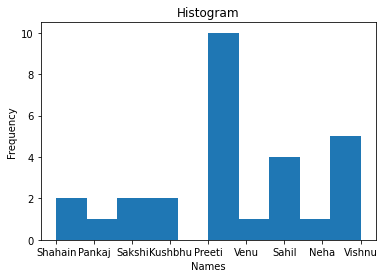

In [14]:
plt.title("Histogram")
plt.xlabel("Names")
plt.ylabel("Frequency")

plt.hist(img.Name)
plt.show()
#turns out preeti sent the highest number of media files

Let's see how many Images were sent in this group

In [15]:
img_ = df[df['Content'].str.contains('image')]
img_

,Date,Time,Name,Content
2,18/12/16,1:57:38,Shahain,<‎image omitted>
3,21/12/16,9:54:46,Pankaj,<‎image omitted>
5,21/12/16,10:48:51,Sakshi,<‎image omitted>
6,21/12/16,10:49:00,Sakshi,<‎image omitted>
22,25/12/16,7:59:17,Preeti,<‎image omitted>
35,1/1/17,3:00:06,Venu,<‎image omitted>
142,12/1/17,12:20:16,Sahil,<‎image omitted>
143,12/1/17,12:20:18,Sahil,<‎image omitted>
144,12/1/17,12:20:18,Sahil,<‎image omitted>
145,12/1/17,12:20:19,Sahil,<‎image omitted>


In [16]:
#img_.count()
img_count = img_.count()
img_count
#hence, out of 28 total media files, 24 of them were images

Date       24
Time       24
Name       24
Content    24
dtype: int64

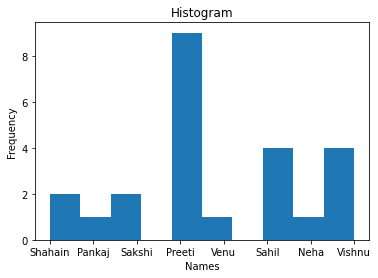

In [17]:
import matplotlib.pyplot as plt
plt.title("Histogram")
plt.xlabel("Names")
plt.ylabel("Frequency")

plt.hist(img_.Name)
plt.show()
#turns out that preeti sent the highest number of images , wow preeti must really has some important media files to share

***What about Videos and GIFs?***

In [18]:
vid = df[df['Content'].str.contains('video')]
vid


,Date,Time,Name,Content
18,22/12/16,12:10:45,Kushbhu,<‎video omitted>
139,11/1/17,11:52:32,Kushbhu,<‎video omitted>
341,6/2/17,12:53:03,Vishnu,<‎video omitted>


hence, as we can see out of 28 total media files only 3 were video files
and khushbu sent the maximum amount of video files followed by vishnu

In [19]:
#leaving us with only 1 gif file sent by preeti
gif = df[df['Content'].str.contains('GIF')]
gif

,Date,Time,Name,Content
39,1/1/17,6:54:40,Preeti,<‎GIF omitted>


***What to do with the 'Missing Text'?***

these are all messages concerned with who added whom in the whatsapp chat or if anyone left the group and stored in a different dataframe
 we wont need these messages in analyzing the groupchat so we will drop these rows

In [20]:
missing_text = df[df['Content'].str.contains('Missing Text')]
missing_text

,Date,Time,Name,Content
0,25/6/15,1:42:12,‎Vishnu,Missing Text
1,25/6/15,1:42:12,‎You,Missing Text
13,22/12/16,12:24:00,‎Messages,Missing Text
69,11/1/17,2:30:16,‎Mukti,Missing Text
115,11/1/17,12:33:37,‎Neha,Missing Text
146,13/1/17,11:18:40,‎Vishnu,Missing Text
147,13/1/17,11:19:42,‎Vishnu,Missing Text
152,15/1/17,12:52:55,‎‪+91 97360 22813‬,Missing Text
153,15/1/17,12:54:06,‎‪+91 85488 44165‬,Missing Text
154,16/1/17,9:11:09,‎Vishnu,Missing Text


In [21]:
missing_text.count()
#there are total 20 rows containing such missing text

Date       20
Time       20
Name       20
Content    20
dtype: int64

In [22]:
#now let's drop it
df.drop(df[df['Content'].str.contains('Missing Text')].index, inplace = True) 
df

,Date,Time,Name,Content
2,18/12/16,1:57:38,Shahain,<‎image omitted>
3,21/12/16,9:54:46,Pankaj,<‎image omitted>
4,21/12/16,9:57:45,Shahain,Wow
5,21/12/16,10:48:51,Sakshi,<‎image omitted>
6,21/12/16,10:49:00,Sakshi,<‎image omitted>
...,...,...,...,...
365,6/2/17,5:13:11,Yogesh,Happy bday Sahil..😊
366,6/2/17,6:42:51,Sahil,thanks yogesh
367,6/2/17,11:36:47,Kushbhu,Happy brthday sahil 🎂
368,7/2/17,12:02:42,Sahil,thanks..... khushboooo


So, now our dataset contains messages that are either textual or media files

**Visualization**

Let's see on which date, most number of messages were recieved!

Text(0, 0.5, 'Date')

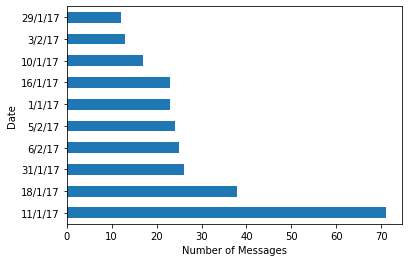

In [23]:
df['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

I guess, the controverial gossips were spilled on 11/1/17 but let's dig deeper

Text(0, 0.5, 'Time')

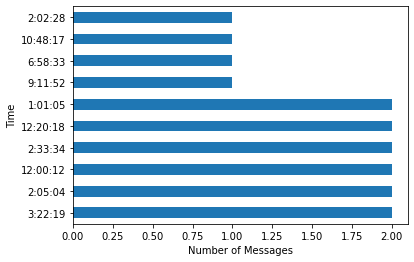

In [24]:
df['Time'].value_counts().head(10).plot.barh() # Top 10 Time on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Time')

From this, we can say that the group is higly active after midnight. Let's do some more exploration!

In [25]:
df['Name'].value_counts()

Vishnu               79
Shahain              71
Preeti               38
Pankaj               32
Mukti                26
Neha                 26
Sahil                19
Nauty's              13
Kushbhu              13
Sakshi                9
Kranthi               7
Venu                  6
Ganguly               4
Shweta                3
Yogesh                3
Shradha               2
‪+91 97360 22813‬     1
Name: Name, dtype: int64

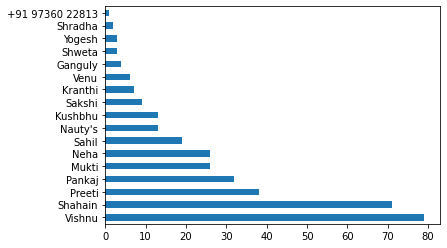

In [26]:
df['Name'].value_counts().plot.barh()

Seems like, Vishnu is the most talkative followed by Shahain and Preeti, Preeti also shares the most media files as we saw above.

In [27]:
#texts from unknown number
for i in df['Name']:
        if '+91' in i :
            print(i)

‪+91 97360 22813‬


Seems like there is only one unknown number chatting in the group and we have already seen that the least amount of texts were sent from this number i.e. 1

In [28]:
import numpy as np
def select_rows(df,search_strings):
    unq,IDs = np.unique(df,return_inverse=True)
    unqIDs = np.searchsorted(unq,search_strings)
    return df[((IDs.reshape(df.shape) == unqIDs[:,None,None]).any(-1)).all(0)]

In [29]:
select_rows(df,['‪+91 97360 22813‬'])

,Date,Time,Name,Content
138,11/1/17,11:32:05,‪+91 97360 22813‬,Eppy bday vishnu Bhai..


Lol, it was just a happy birthday text. I was actually hoping to find something more interesting, but anyway let's move forward

To dive deeper into words and letters, lets remove the media texts from the dataframe to get accurate results

In [30]:
#dropping media files
df = df.drop(img.index)

In [31]:
#words and letters
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))
df.head(10)

,Date,Time,Name,Content,Letter_Count,Word_Count
4,21/12/16,9:57:45,Shahain,Wow,4,2
7,21/12/16,10:50:12,Neha,Awsum😀😀👍🏼👍🏼,12,2
8,21/12/16,10:51:21,Sakshi,🙈,2,2
9,21/12/16,10:57:01,Ganguly,🙂🙂👍🏻👍🏻,7,2
10,21/12/16,11:28:51,Vishnu,Waste out of wealth 😂,22,6
11,21/12/16,11:48:42,Venu,Fancy dress competition?,25,4
12,22/12/16,12:08:04,Kushbhu,😂😂😂,4,2
14,22/12/16,12:25:02,Nauty's,Superrrrrrr se bhiiiiiiii uperrrrrrrr,38,5
15,22/12/16,12:36:54,Sakshi,We were Divided into four groups... Each grou...,116,22
16,22/12/16,6:27:38,Preeti,👌👌👌👌,5,2


In [32]:
columns = ['Letter_Count', 'Word_Count']
df[columns].describe()

,Letter_Count,Word_Count
count,324.000000,324.000000
mean,27.802469,6.416667
std,86.518585,22.470810
min,2.000000,2.000000
25%,6.750000,2.000000
50%,18.000000,4.000000
75%,30.000000,6.000000
max,1500.000000,401.000000


Maximum number of words used is as many as 1500, damn! Let's dive into more visualisations

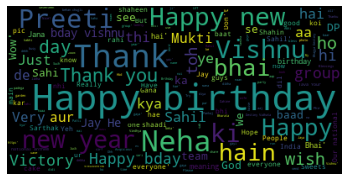

In [33]:
#wordcloud
from wordcloud import WordCloud
text = df['Content'].values 

wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This is it! I hope this helps, however I have not applied advanced techniques into this and tried to keep as easily understandable as it can be! If you found this helpful in any sort of way, dont forget to upvote! Thanks. <3